## Download the Data

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('datasets/vehicles.csv', index_col=0)

## Inspect Data

In [7]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
id,,,,,,,,,,,,,,,,,
7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426880 entries, 7222695916 to 7301591129
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  VIN           265838 non-null  object 
 12  drive         296313 non-null  object 
 13  size          120519 non-null  object 
 14  type          334022 non-null  object 
 15  paint_color   296677 non-null  object 
 16  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(14)
memo

In [9]:
df.describe()

,price,year,odometer
count,4.268800e+05,425675.000000,4.224800e+05
mean,7.519903e+04,2011.235191,9.804333e+04
std,1.218228e+07,9.452120,2.138815e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.900000e+03,2008.000000,3.770400e+04
50%,1.395000e+04,2013.000000,8.554800e+04
75%,2.648575e+04,2017.000000,1.335425e+05
max,3.736929e+09,2022.000000,1.000000e+07


In [10]:
# Predicting car prices.  So Remove rows where price == 0
df = df[df['price'] != 0]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393985 entries, 7222695916 to 7301591129
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        393985 non-null  object 
 1   price         393985 non-null  int64  
 2   year          392812 non-null  float64
 3   manufacturer  377800 non-null  object 
 4   model         389284 non-null  object 
 5   condition     242596 non-null  object 
 6   cylinders     233575 non-null  object 
 7   fuel          391391 non-null  object 
 8   odometer      391695 non-null  float64
 9   title_status  386251 non-null  object 
 10  transmission  392162 non-null  object 
 11  VIN           241827 non-null  object 
 12  drive         273731 non-null  object 
 13  size          111052 non-null  object 
 14  type          308053 non-null  object 
 15  paint_color   276836 non-null  object 
 16  state         393985 non-null  object 
dtypes: float64(2), int64(1), object(14)
memo

In [11]:
# Drop columns deemed not useful for modeling, or would complicate model, or have too many missing values
df = df.drop(columns=['state', 'region', 'VIN', 'paint_color', 'model', 'size', 'drive'])  
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393985 entries, 7222695916 to 7301591129
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         393985 non-null  int64  
 1   year          392812 non-null  float64
 2   manufacturer  377800 non-null  object 
 3   condition     242596 non-null  object 
 4   cylinders     233575 non-null  object 
 5   fuel          391391 non-null  object 
 6   odometer      391695 non-null  float64
 7   title_status  386251 non-null  object 
 8   transmission  392162 non-null  object 
 9   type          308053 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 33.1+ MB


In [12]:
# Drop rows that are missing any of the key column values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143032 entries, 7316814884 to 7301591140
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         143032 non-null  int64  
 1   year          143032 non-null  float64
 2   manufacturer  143032 non-null  object 
 3   condition     143032 non-null  object 
 4   cylinders     143032 non-null  object 
 5   fuel          143032 non-null  object 
 6   odometer      143032 non-null  float64
 7   title_status  143032 non-null  object 
 8   transmission  143032 non-null  object 
 9   type          143032 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 12.0+ MB


In [13]:
df.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,type
id,,,,,,,,,,
7316814884,33590,2014.0,gmc,good,8 cylinders,gas,57923.0,clean,other,pickup
7316814758,22590,2010.0,chevrolet,good,8 cylinders,gas,71229.0,clean,other,pickup
7316814989,39590,2020.0,chevrolet,good,8 cylinders,gas,19160.0,clean,other,pickup
7316743432,30990,2017.0,toyota,good,8 cylinders,gas,41124.0,clean,other,pickup
7316356412,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,truck


In [14]:
# Convert year to age using the latest year as current value
max_year = df['year'].max()
df['age'] = max_year - df['year']
df = df.drop(columns=['year'])
df.describe()

,price,odometer,age
count,1.430320e+05,1.430320e+05,143032.000000
mean,5.432847e+04,1.058421e+05,12.137270
std,1.032529e+07,1.997960e+05,9.766296
min,1.000000e+00,0.000000e+00,0.000000
25%,6.500000e+03,4.600000e+04,6.000000
50%,1.290000e+04,9.700000e+04,10.000000
75%,2.599000e+04,1.438690e+05,15.000000
max,3.736929e+09,1.000000e+07,122.000000


In [15]:
df['title_status'].value_counts()

title_status
clean         136121
rebuilt         3927
salvage         1693
lien             941
missing          281
parts only        69
Name: count, dtype: int64

In [16]:
# Since vast majority of cars have clean titles, we will filter on rows where title_status == clean
df = df[df['title_status'] == 'clean']
df = df.drop('title_status', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136121 entries, 7316814884 to 7301591140
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         136121 non-null  int64  
 1   manufacturer  136121 non-null  object 
 2   condition     136121 non-null  object 
 3   cylinders     136121 non-null  object 
 4   fuel          136121 non-null  object 
 5   odometer      136121 non-null  float64
 6   transmission  136121 non-null  object 
 7   type          136121 non-null  object 
 8   age           136121 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 10.4+ MB


In [17]:
df['condition'].value_counts()

condition
good         61922
excellent    56301
like new     13203
fair          4017
new            538
salvage        140
Name: count, dtype: int64

In [18]:
# To simplify modeling, combine "new" and "like new" conditions and remove "salvage" category
# Later we will use ordinal encoder for the remaining 4 condition categories
df['condition'] = df['condition'].replace("new", "like new")
df = df[df['condition'] != 'salvage']
df['condition'].value_counts()

condition
good         61922
excellent    56301
like new     13741
fair          4017
Name: count, dtype: int64

In [19]:
# Define ordinal mapping for condition
#condition_mapping = {'like new': 4, 'excellent': 3, 'good': 2, 'fair': 1}
#df['condition_encoded'] = df['condition'].map(condition_mapping)
#df = df.drop(columns=['condition'])
#df.head(10)

In [20]:
df['cylinders'].value_counts()

cylinders
6 cylinders     55173
8 cylinders     40217
4 cylinders     38037
5 cylinders       948
10 cylinders      905
other             367
3 cylinders       263
12 cylinders       71
Name: count, dtype: int64

In [21]:
df = df[df['cylinders'] != 'other']

# Extract numeric part and convert to integer
df['cylinders'] = df['cylinders'].str.extract(r'(\d+)').astype(int)
df.head(10)

,price,manufacturer,condition,cylinders,fuel,odometer,transmission,type,age
id,,,,,,,,,
7316814884,33590,gmc,good,8,gas,57923.0,other,pickup,8.0
7316814758,22590,chevrolet,good,8,gas,71229.0,other,pickup,12.0
7316814989,39590,chevrolet,good,8,gas,19160.0,other,pickup,2.0
7316743432,30990,toyota,good,8,gas,41124.0,other,pickup,5.0
7316356412,15000,ford,excellent,6,gas,128000.0,automatic,truck,9.0
7316343444,27990,gmc,good,8,gas,68696.0,other,pickup,10.0
7316304717,34590,chevrolet,good,6,gas,29499.0,other,pickup,6.0
7316285779,35000,toyota,excellent,6,gas,43000.0,automatic,truck,3.0
7316257769,29990,chevrolet,good,6,gas,17302.0,other,pickup,6.0


In [22]:
df.describe()

,price,cylinders,odometer,age
count,1.356140e+05,135614.000000,1.356140e+05,135614.000000
mean,5.645420e+04,6.049176,1.056829e+05,12.140177
std,1.060382e+07,1.567101,1.915751e+05,9.694034
min,1.000000e+00,3.000000,0.000000e+00,0.000000
25%,6.500000e+03,4.000000,4.597900e+04,6.000000
50%,1.299500e+04,6.000000,9.800000e+04,10.000000
75%,2.659000e+04,8.000000,1.441225e+05,15.000000
max,3.736929e+09,12.000000,1.000000e+07,122.000000


## Look at the correlation of numerical predictors and target

In [24]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix['price'].sort_values(ascending=False)

price        1.000000
cylinders    0.004929
age          0.001351
odometer     0.000773
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

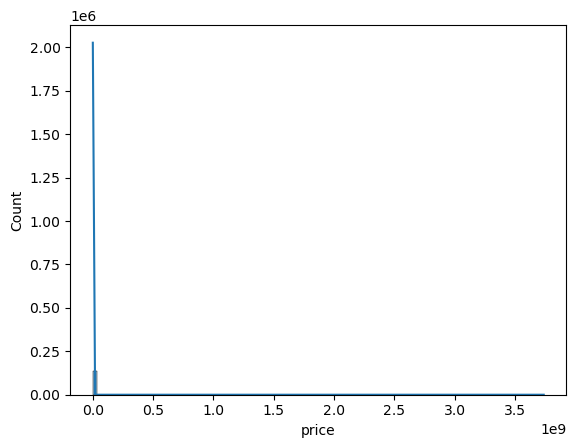

In [25]:
# Correlation is not showing any linear relationship so inspect the distributions via historgrams
sns.histplot(df['price'], bins=100, kde=True)

<Axes: xlabel='odometer', ylabel='Count'>

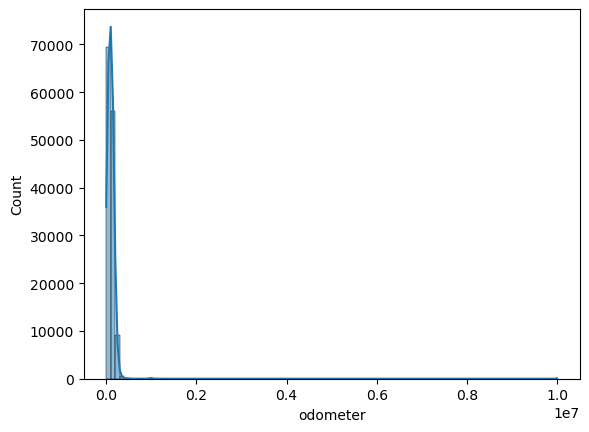

In [26]:
sns.histplot(df['odometer'], bins=100, kde=True)

<Axes: xlabel='age', ylabel='Count'>

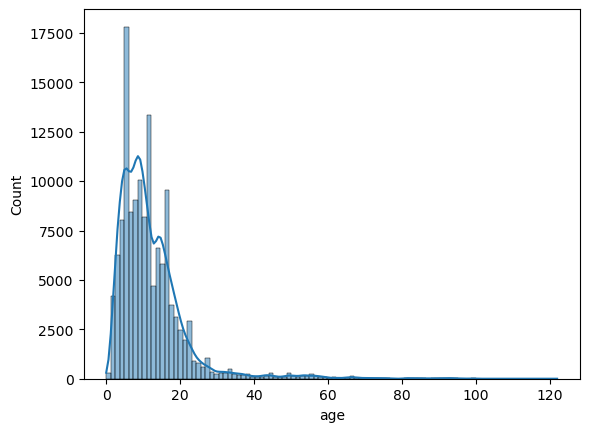

In [27]:
sns.histplot(df['age'], bins=100, kde=True)

<Axes: xlabel='cylinders', ylabel='Count'>

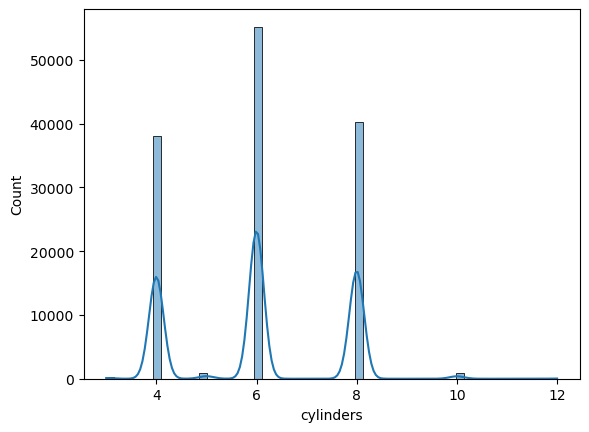

In [28]:
sns.histplot(df['cylinders'], kde=True)

In [29]:
# Because price an odometer are skewed, take the log transformation
df['log_price'] = np.log1p(df['price'])
df['log_odometer'] = np.log1p(df['odometer'])
#df['log_age'] = np.log1p(df['age'])

df = df.drop('price', axis = 1)
df = df.drop('odometer', axis = 1)
#df = df.drop('age', axis = 1)

In [30]:
df.head()

,manufacturer,condition,cylinders,fuel,transmission,type,age,log_price,log_odometer
id,,,,,,,,,
7316814884,gmc,good,8,gas,other,pickup,8.0,10.422013,10.966887
7316814758,chevrolet,good,8,gas,other,pickup,12.0,10.025307,11.173669
7316814989,chevrolet,good,8,gas,other,pickup,2.0,10.586357,9.860632
7316743432,toyota,good,8,gas,other,pickup,5.0,10.341452,10.624371
7316356412,ford,excellent,6,gas,automatic,truck,9.0,9.615872,11.759793


<Axes: xlabel='log_price', ylabel='Count'>

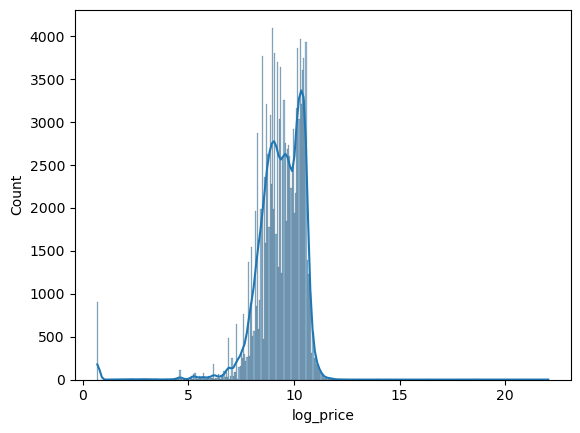

In [31]:
sns.histplot(df['log_price'], kde=True)

<Axes: xlabel='log_odometer', ylabel='Count'>

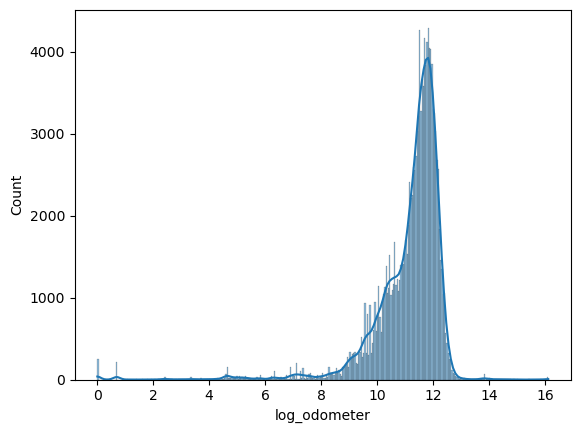

In [32]:
sns.histplot(df['log_odometer'], kde=True)

<Axes: xlabel='cylinders', ylabel='Count'>

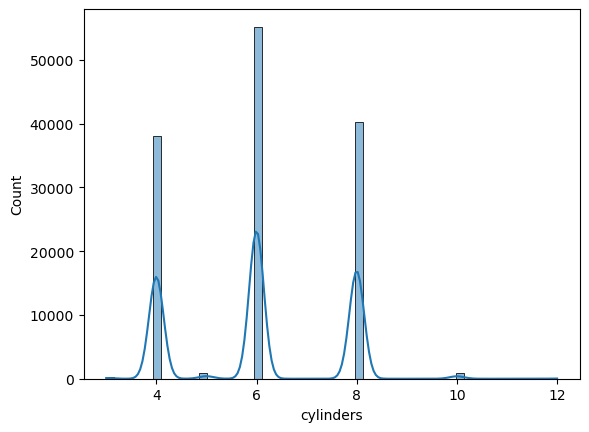

In [33]:
sns.histplot(df['cylinders'], kde=True)

In [34]:
# For cylinders, the data is tri modeal.  So we will turn this into categorical attribute. 
# Define bins and labels
bins = [3, 4, 6, 8, 12]  # Edges for the bins
labels = ['Mode1', 'Mode2', 'Mode3', 'High']  # Labels for each bin

# Create a new categorical column
df['cyl_category'] = pd.cut(df['cylinders'], bins=bins, labels=labels, include_lowest=True)
df = df.drop('cylinders', axis = 1)

In [35]:
df.head()

,manufacturer,condition,fuel,transmission,type,age,log_price,log_odometer,cyl_category
id,,,,,,,,,
7316814884,gmc,good,gas,other,pickup,8.0,10.422013,10.966887,Mode3
7316814758,chevrolet,good,gas,other,pickup,12.0,10.025307,11.173669,Mode3
7316814989,chevrolet,good,gas,other,pickup,2.0,10.586357,9.860632,Mode3
7316743432,toyota,good,gas,other,pickup,5.0,10.341452,10.624371,Mode3
7316356412,ford,excellent,gas,automatic,truck,9.0,9.615872,11.759793,Mode2


In [36]:
df['cyl_category'].value_counts()

cyl_category
Mode2    56121
Mode3    40217
Mode1    38300
High       976
Name: count, dtype: int64

In [37]:
# Transformed attributes now show correlation
corr_matrix = df.corr(numeric_only=True)
corr_matrix['log_price'].sort_values(ascending=False)

log_price       1.000000
age            -0.287245
log_odometer   -0.305607
Name: log_price, dtype: float64

In [38]:
corr_matrix['log_odometer'].sort_values(ascending=False)

log_odometer    1.000000
age             0.152901
log_price      -0.305607
Name: log_odometer, dtype: float64

In [39]:
df.describe()

,age,log_price,log_odometer
count,135614.000000,135614.000000,135614.000000
mean,12.140177,9.347709,11.143877
std,9.694034,1.190471,1.290865
min,0.000000,0.693147,0.000000
25%,6.000000,8.779711,10.735962
50%,10.000000,9.472397,11.492733
75%,15.000000,10.188328,11.878426
max,122.000000,22.041530,16.118096


# Linear Regression

In [74]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer

from sklearn import set_config

set_config(display="diagram") #setting this will display your pipelines as seen above

In [76]:
# Split the data
X = df.drop('log_price', axis = 1)
y = df['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
print(X_train.shape)
print(X_test.shape)
print(type(X_train), type(y_train))

(94929, 8)
(40685, 8)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [78]:
df.head()

,manufacturer,condition,fuel,transmission,type,age,log_price,log_odometer,cyl_category
id,,,,,,,,,
7316814884,gmc,good,gas,other,pickup,8.0,10.422013,10.966887,Mode3
7316814758,chevrolet,good,gas,other,pickup,12.0,10.025307,11.173669,Mode3
7316814989,chevrolet,good,gas,other,pickup,2.0,10.586357,9.860632,Mode3
7316743432,toyota,good,gas,other,pickup,5.0,10.341452,10.624371,Mode3
7316356412,ford,excellent,gas,automatic,truck,9.0,9.615872,11.759793,Mode2


## GridSearchCV Linear Regression with Polynomial and Lasso Feature Selection

In [226]:
num_attribs = ['age', 'log_odometer']
ohe_attribs = ['cyl_category', 'fuel', 'transmission', 'type']

# Preprocessing setup
preprocessor = ColumnTransformer(
    transformers=[
        ('poly_scaler', Pipeline([
            ('poly', PolynomialFeatures(degree=3, include_bias=False)),
            ('scaler', StandardScaler())
        ]), num_attribs),
        ('ohe', OneHotEncoder(drop='if_binary'), ohe_attribs),
        ('ordinal', OrdinalEncoder(categories=[['fair', 'good', 'excellent', 'like new']]), ['condition'])
    ]
)

# Final pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selector', SelectFromModel(Lasso())), 
    ('regressor', LinearRegression())
])

# Define the parameter grid
param_grid = {
    'feature_selector__estimator__alpha': [0.001, 0.01, 0.1, 1, 10],  # Regularization strength for Lasso
    'preprocessor__poly_scaler__poly__degree': [2, 3, 5, 7],          # Degree of polynomial features
}

# Setup GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions using the optimized pipeline
train_preds = best_model.predict(X_train)
test_preds = best_model.predict(X_test)

# Calculate MSE
train_mses = mean_squared_error(y_train, train_preds)
test_mses = mean_squared_error(y_test, test_preds)

# Output results
print("Best Parameters:", best_params)
print(f"Train MSE: {train_mses}")
print(f"Test MSE: {test_mses}")

#pipe.fit(X_train, y_train)

#train_preds = pipe.predict(X_train)
#test_preds = pipe.predict(X_test)
    
# Calculate MSE for both train and test predictions
#train_mses = mean_squared_error(y_train, train_preds)
#test_mses = mean_squared_error(y_test, test_preds)

# Output MSE results
#print(f"Train MSE: {train_mses}")
#print(f"Test MSE: {test_mses}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END feature_selector__estimator__alpha=0.001, preprocessor__poly_scaler__poly__degree=2; total time=   1.6s
[CV] END feature_selector__estimator__alpha=0.001, preprocessor__poly_scaler__poly__degree=2; total time=   1.1s
[CV] END feature_selector__estimator__alpha=0.001, preprocessor__poly_scaler__poly__degree=2; total time=   1.3s
[CV] END feature_selector__estimator__alpha=0.001, preprocessor__poly_scaler__poly__degree=2; total time=   1.3s
[CV] END feature_selector__estimator__alpha=0.001, preprocessor__poly_scaler__poly__degree=2; total time=   1.1s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.077e+02, tolerance: 1.077e+01
  model = cd_fast.enet_coordinate_descent(


[CV] END feature_selector__estimator__alpha=0.001, preprocessor__poly_scaler__poly__degree=3; total time=   4.2s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.076e+02, tolerance: 1.089e+01
  model = cd_fast.enet_coordinate_descent(


[CV] END feature_selector__estimator__alpha=0.001, preprocessor__poly_scaler__poly__degree=3; total time=   4.3s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.400e+02, tolerance: 1.096e+01
  model = cd_fast.enet_coordinate_descent(


[CV] END feature_selector__estimator__alpha=0.001, preprocessor__poly_scaler__poly__degree=3; total time=   4.0s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.453e+02, tolerance: 1.069e+01
  model = cd_fast.enet_coordinate_descent(


[CV] END feature_selector__estimator__alpha=0.001, preprocessor__poly_scaler__poly__degree=3; total time=   4.1s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.046e+02, tolerance: 1.080e+01
  model = cd_fast.enet_coordinate_descent(


[CV] END feature_selector__estimator__alpha=0.001, preprocessor__poly_scaler__poly__degree=3; total time=   4.6s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.463e+01, tolerance: 1.077e+01
  model = cd_fast.enet_coordinate_descent(


[CV] END feature_selector__estimator__alpha=0.001, preprocessor__poly_scaler__poly__degree=5; total time=   5.5s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.558e+01, tolerance: 1.089e+01
  model = cd_fast.enet_coordinate_descent(


[CV] END feature_selector__estimator__alpha=0.001, preprocessor__poly_scaler__poly__degree=5; total time=   5.2s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.037e+01, tolerance: 1.096e+01
  model = cd_fast.enet_coordinate_descent(


[CV] END feature_selector__estimator__alpha=0.001, preprocessor__poly_scaler__poly__degree=5; total time=   6.2s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.470e+02, tolerance: 1.069e+01
  model = cd_fast.enet_coordinate_descent(


[CV] END feature_selector__estimator__alpha=0.001, preprocessor__poly_scaler__poly__degree=5; total time=   5.2s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.764e+02, tolerance: 1.080e+01
  model = cd_fast.enet_coordinate_descent(


[CV] END feature_selector__estimator__alpha=0.001, preprocessor__poly_scaler__poly__degree=5; total time=   5.5s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.661e+02, tolerance: 1.077e+01
  model = cd_fast.enet_coordinate_descent(


[CV] END feature_selector__estimator__alpha=0.001, preprocessor__poly_scaler__poly__degree=7; total time=   7.2s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.928e+01, tolerance: 1.089e+01
  model = cd_fast.enet_coordinate_descent(


[CV] END feature_selector__estimator__alpha=0.001, preprocessor__poly_scaler__poly__degree=7; total time=   7.2s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.881e+02, tolerance: 1.096e+01
  model = cd_fast.enet_coordinate_descent(


[CV] END feature_selector__estimator__alpha=0.001, preprocessor__poly_scaler__poly__degree=7; total time=   7.9s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.693e+02, tolerance: 1.069e+01
  model = cd_fast.enet_coordinate_descent(


[CV] END feature_selector__estimator__alpha=0.001, preprocessor__poly_scaler__poly__degree=7; total time=   6.9s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.226e+02, tolerance: 1.080e+01
  model = cd_fast.enet_coordinate_descent(


[CV] END feature_selector__estimator__alpha=0.001, preprocessor__poly_scaler__poly__degree=7; total time=   7.2s
[CV] END feature_selector__estimator__alpha=0.01, preprocessor__poly_scaler__poly__degree=2; total time=   0.8s
[CV] END feature_selector__estimator__alpha=0.01, preprocessor__poly_scaler__poly__degree=2; total time=   0.6s
[CV] END feature_selector__estimator__alpha=0.01, preprocessor__poly_scaler__poly__degree=2; total time=   0.6s
[CV] END feature_selector__estimator__alpha=0.01, preprocessor__poly_scaler__poly__degree=2; total time=   1.0s
[CV] END feature_selector__estimator__alpha=0.01, preprocessor__poly_scaler__poly__degree=2; total time=   0.7s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.055e+01, tolerance: 1.077e+01
  model = cd_fast.enet_coordinate_descent(


[CV] END feature_selector__estimator__alpha=0.01, preprocessor__poly_scaler__poly__degree=3; total time=   3.7s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.726e+01, tolerance: 1.089e+01
  model = cd_fast.enet_coordinate_descent(


[CV] END feature_selector__estimator__alpha=0.01, preprocessor__poly_scaler__poly__degree=3; total time=   3.6s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.315e+01, tolerance: 1.096e+01
  model = cd_fast.enet_coordinate_descent(


[CV] END feature_selector__estimator__alpha=0.01, preprocessor__poly_scaler__poly__degree=3; total time=   3.6s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.266e+01, tolerance: 1.069e+01
  model = cd_fast.enet_coordinate_descent(


[CV] END feature_selector__estimator__alpha=0.01, preprocessor__poly_scaler__poly__degree=3; total time=   4.1s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.235e+01, tolerance: 1.080e+01
  model = cd_fast.enet_coordinate_descent(


[CV] END feature_selector__estimator__alpha=0.01, preprocessor__poly_scaler__poly__degree=3; total time=   3.8s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.549e+01, tolerance: 1.077e+01
  model = cd_fast.enet_coordinate_descent(


[CV] END feature_selector__estimator__alpha=0.01, preprocessor__poly_scaler__poly__degree=5; total time=   4.7s
[CV] END feature_selector__estimator__alpha=0.01, preprocessor__poly_scaler__poly__degree=5; total time=   4.1s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.518e+01, tolerance: 1.096e+01
  model = cd_fast.enet_coordinate_descent(


[CV] END feature_selector__estimator__alpha=0.01, preprocessor__poly_scaler__poly__degree=5; total time=   5.3s
[CV] END feature_selector__estimator__alpha=0.01, preprocessor__poly_scaler__poly__degree=5; total time=   5.2s
[CV] END feature_selector__estimator__alpha=0.01, preprocessor__poly_scaler__poly__degree=5; total time=   4.5s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.833e+01, tolerance: 1.077e+01
  model = cd_fast.enet_coordinate_descent(


[CV] END feature_selector__estimator__alpha=0.01, preprocessor__poly_scaler__poly__degree=7; total time=   6.0s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.868e+01, tolerance: 1.089e+01
  model = cd_fast.enet_coordinate_descent(


[CV] END feature_selector__estimator__alpha=0.01, preprocessor__poly_scaler__poly__degree=7; total time=   5.8s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.922e+01, tolerance: 1.096e+01
  model = cd_fast.enet_coordinate_descent(


[CV] END feature_selector__estimator__alpha=0.01, preprocessor__poly_scaler__poly__degree=7; total time=   6.5s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.793e+01, tolerance: 1.069e+01
  model = cd_fast.enet_coordinate_descent(


[CV] END feature_selector__estimator__alpha=0.01, preprocessor__poly_scaler__poly__degree=7; total time=   6.5s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.494e+01, tolerance: 1.080e+01
  model = cd_fast.enet_coordinate_descent(


[CV] END feature_selector__estimator__alpha=0.01, preprocessor__poly_scaler__poly__degree=7; total time=   5.6s
[CV] END feature_selector__estimator__alpha=0.1, preprocessor__poly_scaler__poly__degree=2; total time=   0.4s
[CV] END feature_selector__estimator__alpha=0.1, preprocessor__poly_scaler__poly__degree=2; total time=   0.4s
[CV] END feature_selector__estimator__alpha=0.1, preprocessor__poly_scaler__poly__degree=2; total time=   0.4s
[CV] END feature_selector__estimator__alpha=0.1, preprocessor__poly_scaler__poly__degree=2; total time=   0.3s
[CV] END feature_selector__estimator__alpha=0.1, preprocessor__poly_scaler__poly__degree=2; total time=   0.5s
[CV] END feature_selector__estimator__alpha=0.1, preprocessor__poly_scaler__poly__degree=3; total time=   0.2s
[CV] END feature_selector__estimator__alpha=0.1, preprocessor__poly_scaler__poly__degree=3; total time=   0.2s
[CV] END feature_selector__estimator__alpha=0.1, preprocessor__poly_scaler__poly__degree=3; total time=   0.3s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:116: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:116: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:116: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:116: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(


[CV] END feature_selector__estimator__alpha=1, preprocessor__poly_scaler__poly__degree=2; total time=   0.1s
[CV] END feature_selector__estimator__alpha=1, preprocessor__poly_scaler__poly__degree=2; total time=   0.1s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:116: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:116: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(


[CV] END feature_selector__estimator__alpha=1, preprocessor__poly_scaler__poly__degree=2; total time=   0.1s
[CV] END feature_selector__estimator__alpha=1, preprocessor__poly_scaler__poly__degree=3; total time=   0.1s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:116: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:116: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(


[CV] END feature_selector__estimator__alpha=1, preprocessor__poly_scaler__poly__degree=3; total time=   0.2s
[CV] END feature_selector__estimator__alpha=1, preprocessor__poly_scaler__poly__degree=3; total time=   0.2s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:116: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:116: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(


[CV] END feature_selector__estimator__alpha=1, preprocessor__poly_scaler__poly__degree=3; total time=   0.2s
[CV] END feature_selector__estimator__alpha=1, preprocessor__poly_scaler__poly__degree=3; total time=   0.1s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:116: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:116: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(


[CV] END feature_selector__estimator__alpha=1, preprocessor__poly_scaler__poly__degree=5; total time=   0.2s
[CV] END feature_selector__estimator__alpha=1, preprocessor__poly_scaler__poly__degree=5; total time=   0.2s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:116: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:116: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(


[CV] END feature_selector__estimator__alpha=1, preprocessor__poly_scaler__poly__degree=5; total time=   0.1s
[CV] END feature_selector__estimator__alpha=1, preprocessor__poly_scaler__poly__degree=5; total time=   0.2s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:116: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:116: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(


[CV] END feature_selector__estimator__alpha=1, preprocessor__poly_scaler__poly__degree=5; total time=   0.2s
[CV] END feature_selector__estimator__alpha=1, preprocessor__poly_scaler__poly__degree=7; total time=   0.2s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:116: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:116: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(


[CV] END feature_selector__estimator__alpha=1, preprocessor__poly_scaler__poly__degree=7; total time=   0.2s
[CV] END feature_selector__estimator__alpha=1, preprocessor__poly_scaler__poly__degree=7; total time=   0.2s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:116: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:116: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(


[CV] END feature_selector__estimator__alpha=1, preprocessor__poly_scaler__poly__degree=7; total time=   0.2s
[CV] END feature_selector__estimator__alpha=1, preprocessor__poly_scaler__poly__degree=7; total time=   0.2s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:116: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:116: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(


[CV] END feature_selector__estimator__alpha=10, preprocessor__poly_scaler__poly__degree=2; total time=   0.1s
[CV] END feature_selector__estimator__alpha=10, preprocessor__poly_scaler__poly__degree=2; total time=   0.1s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:116: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:116: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(


[CV] END feature_selector__estimator__alpha=10, preprocessor__poly_scaler__poly__degree=2; total time=   0.2s
[CV] END feature_selector__estimator__alpha=10, preprocessor__poly_scaler__poly__degree=2; total time=   0.1s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:116: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:116: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(


[CV] END feature_selector__estimator__alpha=10, preprocessor__poly_scaler__poly__degree=2; total time=   0.1s
[CV] END feature_selector__estimator__alpha=10, preprocessor__poly_scaler__poly__degree=3; total time=   0.1s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:116: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:116: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(


[CV] END feature_selector__estimator__alpha=10, preprocessor__poly_scaler__poly__degree=3; total time=   0.2s
[CV] END feature_selector__estimator__alpha=10, preprocessor__poly_scaler__poly__degree=3; total time=   0.1s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:116: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:116: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(


[CV] END feature_selector__estimator__alpha=10, preprocessor__poly_scaler__poly__degree=3; total time=   0.1s
[CV] END feature_selector__estimator__alpha=10, preprocessor__poly_scaler__poly__degree=3; total time=   0.1s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:116: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:116: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(


[CV] END feature_selector__estimator__alpha=10, preprocessor__poly_scaler__poly__degree=5; total time=   0.1s
[CV] END feature_selector__estimator__alpha=10, preprocessor__poly_scaler__poly__degree=5; total time=   0.1s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:116: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:116: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(


[CV] END feature_selector__estimator__alpha=10, preprocessor__poly_scaler__poly__degree=5; total time=   0.2s
[CV] END feature_selector__estimator__alpha=10, preprocessor__poly_scaler__poly__degree=5; total time=   0.1s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:116: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:116: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(


[CV] END feature_selector__estimator__alpha=10, preprocessor__poly_scaler__poly__degree=5; total time=   0.2s
[CV] END feature_selector__estimator__alpha=10, preprocessor__poly_scaler__poly__degree=7; total time=   0.2s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:116: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:116: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(


[CV] END feature_selector__estimator__alpha=10, preprocessor__poly_scaler__poly__degree=7; total time=   0.2s
[CV] END feature_selector__estimator__alpha=10, preprocessor__poly_scaler__poly__degree=7; total time=   0.2s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:116: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(


[CV] END feature_selector__estimator__alpha=10, preprocessor__poly_scaler__poly__degree=7; total time=   0.2s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/feature_selection/_base.py:116: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/berkeley/lib/python3.12/site-pack

[CV] END feature_selector__estimator__alpha=10, preprocessor__poly_scaler__poly__degree=7; total time=   0.2s


/opt/anaconda3/envs/berkeley/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.939e+02, tolerance: 1.353e+01
  model = cd_fast.enet_coordinate_descent(


Best Parameters: {'feature_selector__estimator__alpha': 0.001, 'preprocessor__poly_scaler__poly__degree': 7}
Train MSE: 0.8792865219289346
Test MSE: 0.8537694696719367


## GridSearchCV Linear Regression with Polynomial Features and Ridge

In [81]:
num_attribs = ['age', 'log_odometer']
ohe_attribs = ['cyl_category', 'fuel', 'transmission', 'type']

# Preprocessing setup
preprocessor = ColumnTransformer(
    transformers=[
        ('poly_scaler', Pipeline([
            ('poly', PolynomialFeatures(degree=3, include_bias=False)),
            ('scaler', StandardScaler())
        ]), num_attribs),
        ('ohe', OneHotEncoder(drop='if_binary'), ohe_attribs),
        ('ordinal', OrdinalEncoder(categories=[['fair', 'good', 'excellent', 'like new']]), ['condition'])
    ]
)

# Final pipeline with Ridge
pipe2 = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# Define parameter grid for GridSearchCV
param_grid = {
    'preprocessor__poly_scaler__poly__degree': [2, 3, 4, 5, 6, 7],
    'regressor__alpha': [0.1, 1, 10, 100]  # Ridge regularization parameter
}

# GridSearchCV
grid_search = GridSearchCV(pipe2, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Evaluate the best model
best_model = grid_search.best_estimator_

# Predictions
train_preds = best_model.predict(X_train)
test_preds = best_model.predict(X_test)

# Calculate MSE for both train and test predictions
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

# Output results
print(f"Best parameters: {grid_search.best_params_}")
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")


Best parameters: {'preprocessor__poly_scaler__poly__degree': 6, 'regressor__alpha': 0.1}
Train MSE: 0.8746914759583171
Test MSE: 0.8494672967874106


In [87]:
# Extract the Ridge model from the best pipeline
ridge_model = best_model.named_steps['regressor']

# Access the fitted preprocessor
fitted_preprocessor = best_model.named_steps['preprocessor']

# Get numerical feature names from PolynomialFeatures
num_features = fitted_preprocessor.transformers_[0][1].named_steps['poly'].get_feature_names_out(num_attribs)

# Get categorical feature names from OneHotEncoder
cat_features = fitted_preprocessor.transformers_[1][1].get_feature_names_out(ohe_attribs)

# Combine all feature names
ordinal_features = ['condition']  # Ordinal features are unchanged
all_feature_names = list(num_features) + list(cat_features) + ordinal_features

# Extract coefficients
coefficients = ridge_model.coef_

# Create a dictionary mapping features to coefficients
coeff_dict = dict(zip(all_feature_names, coefficients))

# Output coefficients with feature names
print("\nFeature Coefficients:")
for feature, coef in coeff_dict.items():
    print(f"{feature}: {coef}")



Feature Coefficients:
age: -1.8994527807972554
log_odometer: -0.38858385672712953
age^2: 1.1364151137538203
age log_odometer: 1.8839836003214696
log_odometer^2: 0.21226488021770237
age^3: 4.297432271617688
age^2 log_odometer: -3.914077387110437
age log_odometer^2: 2.1035445458364967
log_odometer^3: 3.092718599030697
age^4: -7.860248113237598
age^3 log_odometer: 9.350316891300324
age^2 log_odometer^2: -9.54268521640144
age log_odometer^3: -0.2904623849996838
log_odometer^4: -2.38629944027371
age^5: 4.508179151501234
age^4 log_odometer: -6.888553941886881
age^3 log_odometer^2: 1.2023642860208221
age^2 log_odometer^3: 8.296049011280504
age log_odometer^4: -0.7647372018827472
log_odometer^5: -4.949522209988625
age^6: -0.6535312005791186
age^5 log_odometer: 0.6736256698356389
age^4 log_odometer^2: 4.130256178089737
age^3 log_odometer^3: -6.457312885998697
age^2 log_odometer^4: 2.173403306145584
age log_odometer^5: -2.001488908118282
log_odometer^6: 4.427224881432693
cyl_category_High: -1.1

## Visualize the most important features to predicting car price

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

feature_names = [
    "age", "log_odometer", "age^2", "age log_odometer", "log_odometer^2",
    "age^3", "age^2 log_odometer", "age log_odometer^2", "log_odometer^3",
    "age^4", "age^3 log_odometer", "age^2 log_odometer^2", "age log_odometer^3", 
    "log_odometer^4", "age^5", "age^4 log_odometer", "age^3 log_odometer^2",
    "age^2 log_odometer^3", "age log_odometer^4", "log_odometer^5", "age^6",
    "age^5 log_odometer", "age^4 log_odometer^2", "age^3 log_odometer^3",
    "age^2 log_odometer^4", "age log_odometer^5", "log_odometer^6",
    "cyl_category_High", "cyl_category_Mode1", "cyl_category_Mode2", 
    "cyl_category_Mode3", "fuel_diesel", "fuel_electric", "fuel_gas", 
    "fuel_hybrid", "fuel_other", "transmission_automatic", "transmission_manual",
    "transmission_other", "type_SUV", "type_bus", "type_convertible", 
    "type_coupe", "type_hatchback", "type_mini-van", "type_offroad",
    "type_other", "type_pickup", "type_sedan", "type_truck", "type_van", 
    "type_wagon", "condition"
]

coefficients = [
    -1.899, -0.389, 1.136, 1.884, 0.212, 4.297, -3.914, 2.104, 3.093, -7.860, 
    9.350, -9.543, -0.290, -2.386, 4.508, -6.889, 1.202, 8.296, -0.765, -4.950, 
    -0.654, 0.674, 4.130, -6.457, 2.173, -2.001, 4.427, -1.170, 0.139, 0.408, 
    0.623, 0.353, 0.088, -0.231, -0.123, -0.087, -0.013, 0.085, -0.072, -0.004, 
    0.181, 0.276, 0.023, -0.266, -0.388, 0.391, 0.262, 0.188, -0.308, 0.219, 
    -0.047, -0.527, 0.031
]

# Create a DataFrame
feature_importance = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients,
    "Absolute Coefficient": [abs(c) for c in coefficients]
})

# Sort by absolute coefficient
feature_importance = feature_importance.sort_values(by="Absolute Coefficient", ascending=False)

# Display top 10 features
print(feature_importance.head(10))


                 Feature  Coefficient  Absolute Coefficient
11  age^2 log_odometer^2       -9.543                 9.543
10    age^3 log_odometer        9.350                 9.350
17  age^2 log_odometer^3        8.296                 8.296
9                  age^4       -7.860                 7.860
15    age^4 log_odometer       -6.889                 6.889
23  age^3 log_odometer^3       -6.457                 6.457
19        log_odometer^5       -4.950                 4.950
14                 age^5        4.508                 4.508
26        log_odometer^6        4.427                 4.427
5                  age^3        4.297                 4.297


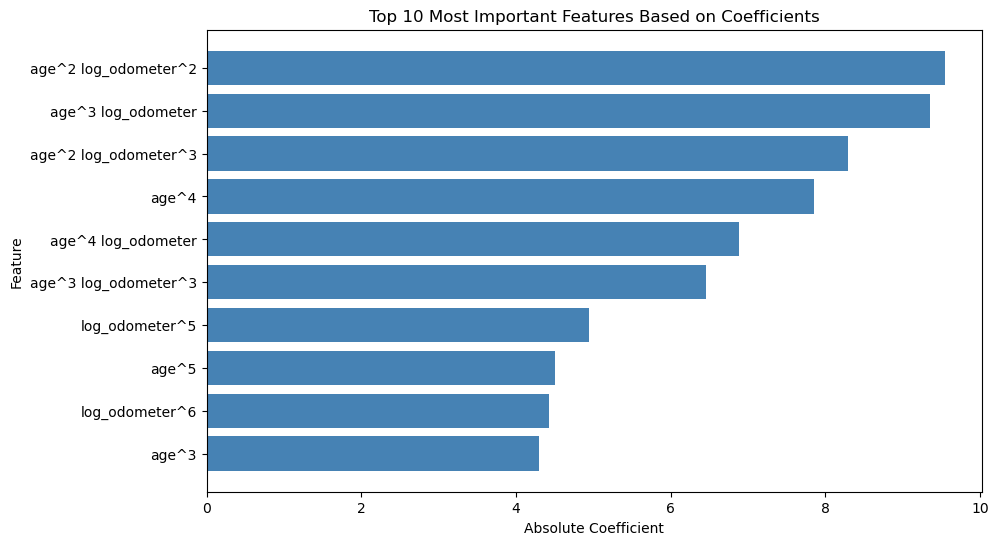

In [91]:
# Plot top 10 features
top_features = feature_importance.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_features["Feature"], top_features["Absolute Coefficient"], color="steelblue")
plt.xlabel("Absolute Coefficient")
plt.ylabel("Feature")
plt.title("Top 10 Most Important Features Based on Coefficients")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

